## Introduction to ARIMA model

- ARIMA stands for **Autoregressive Integrated Moving Average** Model. It belongs to a class of models that explains a given time series based on its own past values -i.e.- its own lags and the lagged forecast errors. The equation can be used to forecast future values. 

- Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models. So, ARIMA, short for AutoRegressive Integrated Moving Average, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values. 

- ARIMA Models are specified by three order parameters: (p, d, q), where,

1. p is the order of the AR term

2. q is the order of the MA term

3. d is the number of differencing required to make the time series stationary

- AR(p) Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.

- I(d) Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.

- MA(q) Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

### The meaning of p, d and q in ARIMA model

1. The meaning of p: p is the order of the Auto Regressive (AR) term. It refers to the number of lags of Y to be used as predictors.

2. The meaning of d: The term Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as we know, work best when the predictors are **not correlated** and are **independent** of each other. So we need to make the time series stationary. The most common approach to make the series stationary is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed. The value of **d**, therefore, is the minimum number of differencing needed to make the series stationary. If the time series is already stationary, then d = 0.

3. The meaning of q: q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

### Types of ARIMA Model

- ARIMA : Non-seasonal Autoregressive Integrated Moving Averages

- SARIMA : Seasonal ARIMA

- SARIMAX : Seasonal ARIMA with exogenous variables

If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for Seasonal ARIMA.

## AR and MA models

1. AR model - An Auto Regressive (AR) model is one where $Y_t$ depends only on its own lags.

It is depicted by the following equation 
$$
Y_t = \alpha + \beta_1Y_{t-1} + \beta_2Y_{t-2} + \cdots + \beta_p Y_{t-p} +\epsilon_1,
$$
where

- $Y_{t−1} is the lag $1$ of the series,

- $\beta_1$ is the coefficient of lag $1$ that the model estimates, and

- $\alpha$ is the intercept term, also estimated by the model.

2. Moving Average (MA) model is one where $Y_t$ depends only on the lagged forecast errors. It is depicted by the following equation
$$
Y_t = \alpha +\epsilon_t +\phi_1\epsilon_{t-1} + \phi_2\epsilon_{t-2} +\cdots +\phi_q \epsilon_{t-q},
$$
where $\epsilon_i$ are the error terms in AR model of the respective lags. For example, $\epsilon_t$ is the error term of
$$
Y_t = \beta_1Y_{t-1} + \beta_2Y_{t-2} + \cdots + \beta_0 Y_{0} +\epsilon_t.
$$

3. ARIMA model- An ARIMA model is one where the time series was differenced at least once to make it stationary and we combine the AR and the MA terms. So the equation of an ARIMA model becomes :
$$
Y_t =  \alpha + \beta_1Y_{t-1} + \beta_2Y_{t-2} + \cdots + \beta_p Y_{t-p}\epsilon_t + \phi_1\epsilon_{t-1} + \phi_2\epsilon_{t-2} +\cdots +\phi_q \epsilon_{t-q}.
$$


## How to find the order of differencing (d) in ARIMA model

- As stated earlier, the purpose of differencing is to make the time series stationary. But we should be careful to not over-difference the series. An over differenced series may still be stationary, which in turn will affect the model parameters.
So we should determine the right order of differencing. 

- The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

- If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

- If we can’t really decide between two orders of differencing, then we go with the order that gives the least standard deviation in the differenced series.

- Now, we will explain these concepts with the help of an example as follows:

1. I will check if the series is stationary using the Augmented Dickey Fuller test (ADF Test), from the statsmodels package. The reason being is that we need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

2. The null hypothesis (Ho) of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary. So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import opendatasets as od

from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
od.download("https://www.kaggle.com/datasets/prashant111/dataset/data")

Dataset URL: https://www.kaggle.com/datasets/prashant111/dataset


100%|██████████| 1.74k/1.74k [00:00<00:00, 355kB/s]

In [5]:
file_path = "arima_dataset/dataset.txt"
df = pd.read_csv(file_path)
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [7]:
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.145186
p-value: 1.000000


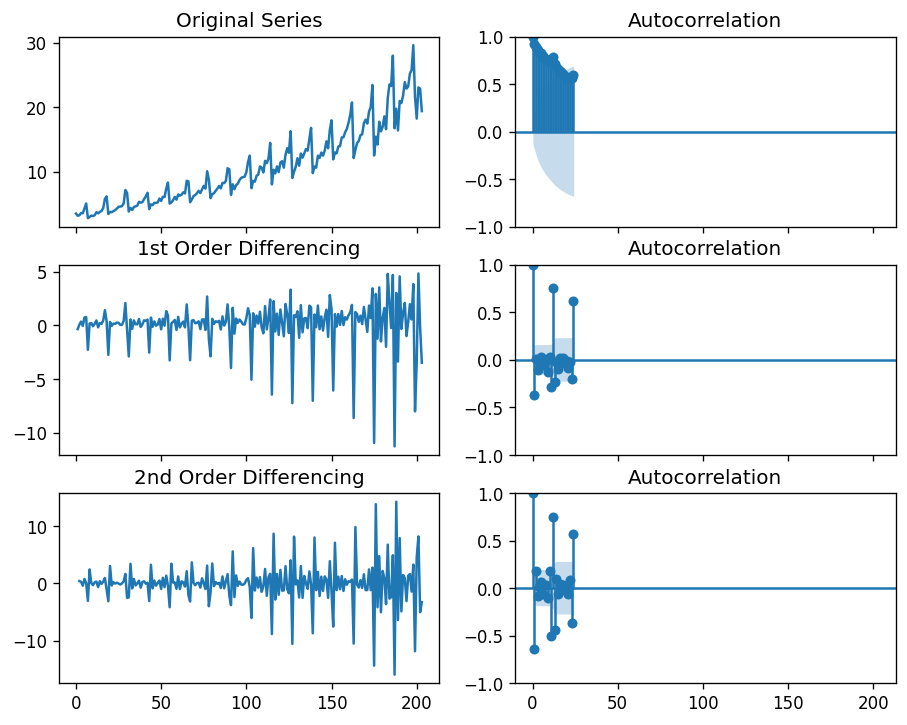

In [9]:
# Since p-value(1.00) is greater than the significance level(0.05), we do not reject the null hypothesis, i.e. the data is not stationary.
# let’s difference the series and see how the autocorrelation plot looks like.

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

#Conclusion: we can see that the time series reaches stationarity with two orders of differencing.